<a href="https://colab.research.google.com/github/antonioravila/Alura-Cursos/blob/main/Data_Science_Primeiros_Passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
import seaborn as sns

In [ ]:
print(sns.__version__)

0.11.0


# Introdução - Notas gerais

In [ ]:
# Importa o Pandas e lê o arquivo em csv

import pandas as pd

notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/aula2/aula2.1/ratings.csv')

In [ ]:
# Retorna as 5 primeiras linhas

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Retorna a quantidade de linhas e colunas

notas.shape

(100836, 4)

In [ ]:
# Redefine os nomes das colunas

notas.columns = ['UsuarioId', 'FilmeId', 'Nota', 'Momento']
notas.head()

,UsuarioId,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Retorna uma serie específica

notas['Nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [ ]:
#Retorna os valores unicos de uma serie

notas['Nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
#Retorna a quantidade de cada valor em determinada serie

notas['Nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

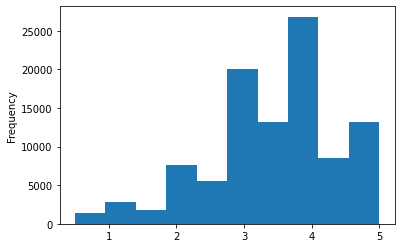

In [ ]:
#cria um gráfico, do tipo histograma
notas.Nota.plot(kind='hist')

In [ ]:
#retorna a média
notas.Nota.mean()

3.501556983616962

In [ ]:
#retorna a mediana
notas.Nota.median()

3.5

In [ ]:
#descreve algumas das caracteristicas do dataset
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

#Seaborn (introdução leve)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


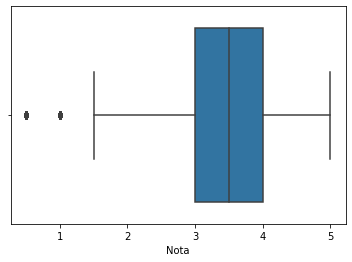

In [ ]:
'''

Esse gráfico mostra distribuição das notas
alguns pontos:
 - Os dois retangulos verticais azuis representaão 50% dos votos,
 ou seja, metade das notas dadas, individualmente foram entre 3 e 4
 - A mediana desse gráfico está representada na divisão entre os dois
 retangulos azuis
 - As duas retas horizontais representam, cada uma, 25% das notas
 - As notas entre 0,5 e 1,5 são de pequena quantidade

 '''
sns.boxplot(notas.Nota)

#Movies.csv - Notas específicas

In [ ]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/aula2/aula2.1/movies.csv')
filmes.columns = ['FilmeId', 'Titulo', 'Generos']
filmes.head()

,FilmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,UsuarioId,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.query('FilmeId==1').Nota.mean()

3.9209302325581397

In [ ]:
medias_por_filme = notas.groupby('FilmeId').mean().Nota
medias_por_filme.head()

FilmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

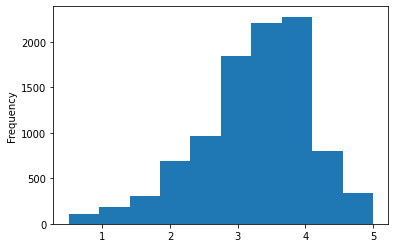

In [ ]:
medias_por_filme.plot(kind='hist')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


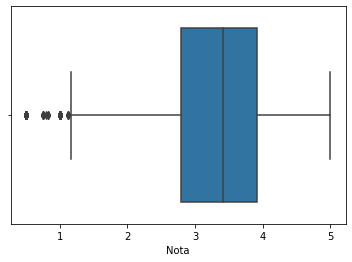

In [ ]:
sns.boxplot(medias_por_filme)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


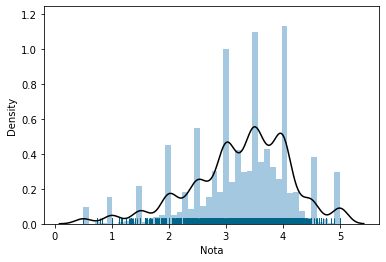

In [ ]:
sns.distplot(medias_por_filme, hist=True, kde=True, kde_kws={'color': 'black'}, rug=True, rug_kws={"color": "#006589"})

#TMDB

In [ ]:
tmdb = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv')

In [ ]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.revenue.median()

19170001.0

In [ ]:
tmdb.original_language.unique() #variável qualitativa(categórica) nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau -> 2 grau -> 3 grau # variável qualitativa(categórica) ordinal

In [ ]:
tmdb.budget.head() #variavel quantitativa contínua

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [ ]:
# quantidade de votos == variavel quantitativa (1, 2, 3, 4... não existem 4,5 votos)
# variavel quantitativa discreta(ou intervalar)

In [ ]:
''' 
> Variáveis Quantitativas: são representadas por meio de números resultantes de 
uma contagem ou mensuração. Elas podem ser de dois tipos:

  - Variáveis discretas: os valores representam um conjunto finito ou enumerável
  de números, e que resultam de uma contagem, por exemplo: Número de filhos 
  (0,1,2,…), número de bactérias por amostra, número de copos de cerveja tomados
   por dia.

  - Variáveis contínuas: os valores pertencem a um intervalo de números reais 
  e representam uma mensuração como por exemplo altura ou peso de uma pessoa. 
  Nesses casos números fracionais fazem sentido. Exemplo: tempo (relógio) e 
  pressão arterial.

> Variáveis Qualitativas (Categórica): representam uma qualidade (ou atributo) de um indivíduo pesquisado, 
são definidas por várias categorias. São características que não possuem valores quantitativos. 
Essas variáveis podem ser de dois tipos:

  - Variável nominal: quando não existe nenhuma ordenação nas possíveis representações. 
  Exemplos: sexo, cor dos olhos, cor do cabelo, fumante/não fumante.

  - Variável ordinal: quando apresentam uma ordem nos seus resultados. 
  Exemplos: escolaridade (1, 2, 3 graus), mês de observação (janeiro, fevereiro, …, dezembro.)
  
'''



' \n> Variáveis Quantitativas: são representadas por meio de números resultantes de \numa contagem ou mensuração. Elas podem ser de dois tipos:\n\n  - Variáveis discretas: os valores representam um conjunto finito ou enumerável\n  de números, e que resultam de uma contagem, por exemplo: Número de filhos \n  (0,1,2,…), número de bactérias por amostra, número de copos de cerveja tomados\n   por dia.\n\n  - Variáveis contínuas: os valores pertencem a um intervalo de números reais \n  e representam uma mensuração como por exemplo altura ou peso de uma pessoa. \n  Nesses casos números fracionais fazem sentido. Exemplo: tempo (relógio) e \n  pressão arterial.\n\n> Variáveis Qualitativas (Categórica): representam uma qualidade (ou atributo) de um indivíduo pesquisado, \nsão definidas por várias categorias. São características que não possuem valores quantitativos. \nEssas variáveis podem ser de dois tipos:\n\n  - Variável nominal: quando não existe nenhuma ordenação nas possíveis representaçõ

In [ ]:
"""
Contando os valores de cada uma dessas variáveis categóricas nominais
É importante lembrar que a série abaixo apresenta um índice(en, fr, es) e um
valor (4505, 70, 32)
"""
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ro       2
ta       2
id       2
cs       2
ar       2
hu       1
af       1
pl       1
ps       1
no       1
ky       1
xx       1
te       1
nb       1
is       1
vi       1
tr       1
el       1
sl       1
Name: original_language, dtype: int64

In [ ]:
#retornando o index (índice) da série acima
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'ta', 'id', 'cs', 'ar', 'hu',
       'af', 'pl', 'ps', 'no', 'ky', 'xx', 'te', 'nb', 'is', 'vi', 'tr', 'el',
       'sl'],
      dtype='object')

In [ ]:
#retornando os values (valores) da série acima
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
'''
- primeiramente, o comando "to_frame()" transforma a série, em um data frame
- depois disso, ainda na mesma linha de código, o comando ".reset_index()" irá 
retirar o index anterior (en, fr), o transformando em coluna, assim criando um 
novo index7
- posteriomente foram mudadas as colunas, já que a que trata das linguagens 
estava nomeada como "index"
'''
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


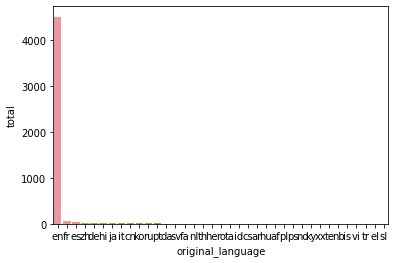

In [ ]:
#plotando os dados categóricos, em um gráfico de barras
sns.barplot(x = 'original_language', y = 'total', data = contagem_de_linguas)

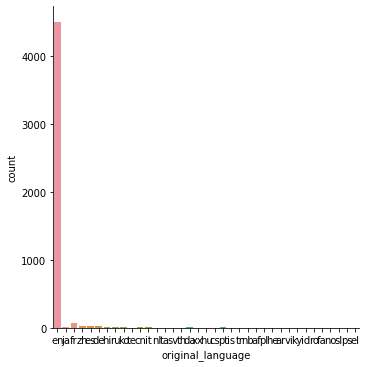

In [ ]:
"""
Apesar de funcionar, o processo anterior é muito trabalhoso.
Tendo isso em vista, aqui utilizarei o catplot, que plota definindo por 
categorias
"""
sns.catplot(x = 'original_language', kind='count', data = tmdb)

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fc25758a4a8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

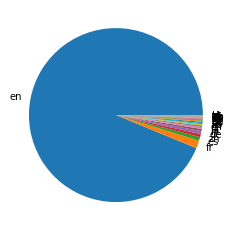

In [ ]:
"""
- O primeiro paramêtro vai selecionar quais dados devem fazer parte do 
gráfico de pizza
- O segundo parametro determina quais vão ser os labels do gráfico
"""
plt.pie(contagem_de_linguas["total"], labels = contagem_de_linguas["original_language"])

In [ ]:
'''
*** 
Nos dois gráficos anteriores, a visualização foi muito ruim, já que os 
filmes em inglês são absurdamente predominantes. Sendo assim, o objetivo aqui 
será resolver esse problema, tornando assim possível a visualização dos filmes 
em inglês e do resto (todo somado).
***

1 - alocamos os valores unicos da coluna "original_language" na variavel 
"total_por_lingua"
2 - calculamos o total geral de linguas, mesmo que repetidas, ou seja, 
calculamos a quantidade de filmes totais. A função sum calcula a soma de tudo 
junto
3 - Depois alocamos a quantidade dos valores "en" na variável "total_de_ingles"
4 - Depois, tendo em vista conseguir a quantidade de valores que não são "en" subtraímos as varíaveis "total_geral" e "total_de_ingles"
'''
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles

In [ ]:
# Mostramos os valores obtidos acima
print(f' o total do resto é {total_do_resto}, o total de inglês é {total_de_ingles} e o geral é {total_geral}')

 o total do resto é 298, o total de inglês é 4505 e o geral é 4803


In [ ]:
"""
Criamos um dicionário, onde o objetivo é, por meio das chaves('lingua' e 'total'), 
armazenamos os valores das legendas e das quantidades
"""
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [ ]:
# Criamos um dataset por meio do dicionário criado acima
dados = pd.DataFrame(dados)

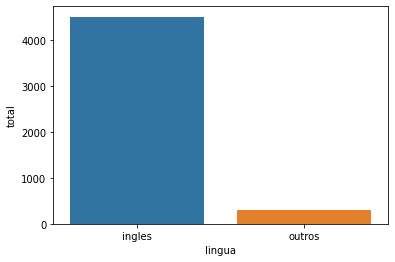

In [ ]:
#Plotamos um gráfico de barra com as informações abaixo
sns.barplot(x = 'lingua', y = 'total', data = dados)

([<matplotlib.patches.Wedge at 0x7fc25742ee48>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

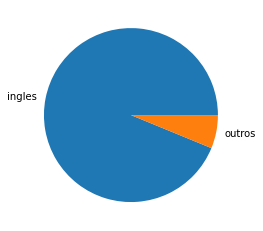

In [ ]:
#Plotamos um gráfico de "torta" com os dados apresentados abaixo
plt.pie(dados['total'], labels = dados['lingua'])

In [ ]:
"""
Nesse código estou buscando o total por lingua dos filmes que não são em inglês.
dessa maneira somente as informações que tratam do total por lingua serão
selecionadas
""" 
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"')["original_language"].value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
id     2
ro     2
cs     2
ar     2
sl     1
is     1
el     1
hu     1
ps     1
te     1
xx     1
no     1
af     1
nb     1
pl     1
vi     1
ky     1
tr     1
Name: original_language, dtype: int64

In [ ]:
"""
Aqui diferenteemnte da parte de cima, está sendo feita a seleção em todo o 
dataset, não somente buscando o total por lingua e selecionando todas as 
caracteristicas e dados dos filmes que possuem a lingua diferente do inglês
"""

filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')
filmes_sem_lingua_original_em_ingles.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471


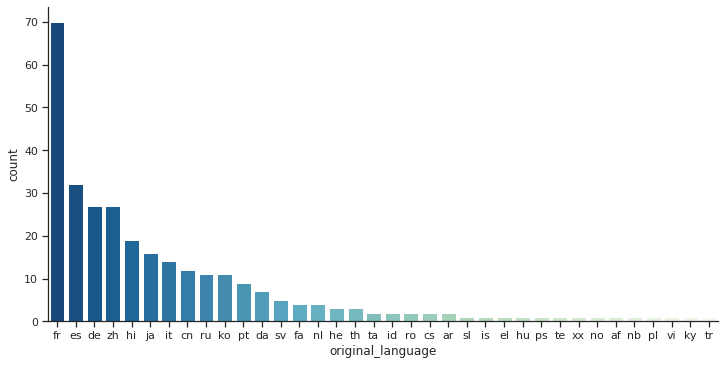

In [ ]:
"""
- Aqui, plotei os dados dos filmes que não são em inglês por lingua original
- Depois de plotar ainda adicionei parâmetros, sendo eles:
  . "aspect" (muda o tamanho do gráfico)
  . "order" (muda a ordem dos dados categóricos contados)
  . "pallete (muda as cores de visualização)
"""
sns.catplot(x = 'original_language', kind='count', 
            data = filmes_sem_lingua_original_em_ingles, aspect = 2,
            palette=("GnBu_r"), 
            order = total_por_lingua_de_outros_filmes.index)

# **Exemplo Breve**
### Gráfico Linear

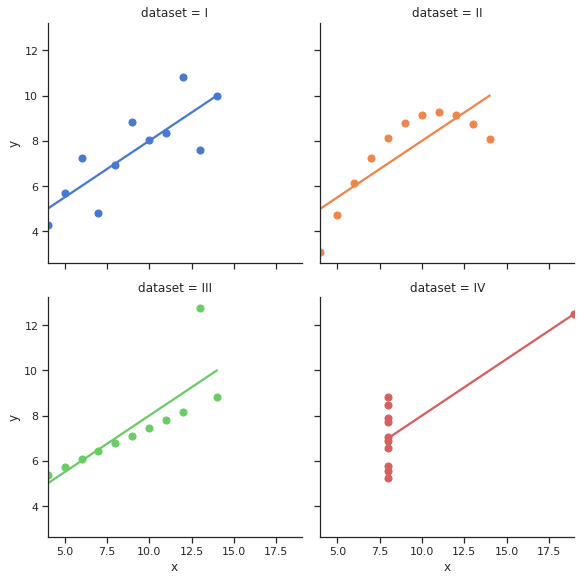

In [ ]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Final do curso

Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [ ]:
"""
meu objetivo nesse final é conseguir a média de notas de filmes específicos
Dessa maneira, primeiramente irei visualizar os dois datasets, para saber tanto 
quais são os filmeIDs como quais são as colunas
"""
filmes.head(2)

,FilmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas.head(2)

,UsuarioId,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [ ]:
"""
- Dessa maneira, a primeira coisa que devo fazer é utilizar a função "query", 
para poder separar, dentro do dataset das notas, os filmes específicos
- Os dois filmes selecionados foram o de ID 1, e 2. Seu nomes verdadeiros, assim 
como checados no dataset "filmes", são Jumanji e Toy Story, respectivamente
"""
notas_do_toy_story = notas.query("FilmeId==1")
notas_do_jumanji = notas.query("FilmeId==2")
print(len(notas_do_toy_story))
print(len(notas_do_jumanji))

215
110


In [ ]:
"""
Sendo assim, buscarei dentro da coluna nota, e farei a média
"""
print(f'a média das notas do Toy Story é {notas_do_toy_story["Nota"].mean():.2f}')
print(f'a média das notas do Jumanji é {notas_do_jumanji["Nota"].mean():.2f}')

a média das notas do Toy Story é 3.92
a média das notas do Jumanji é 3.43


In [ ]:
print(f'a mediana das notas do Toy Story é {notas_do_toy_story["Nota"].median():.2f}')
print(f'a mediana das notas do Jumanji é {notas_do_jumanji["Nota"].median():.2f}')

a mediana das notas do Toy Story é 4.00
a mediana das notas do Jumanji é 3.50
